# TimeEvolvingMPO - Tutorial



First, let's import TimeEvolvingMPO and some other packages we are going to use

In [1]:
import sys
sys.path.insert(0,'..')
import os
from time import time

os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

import time_evolving_mpo as tempo
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
Omega = 1.0
omega_cutoff = 3.0
alpha = 0.12
start_time = 0.0
end_time = 10.0
initial_state = tempo.operators.spin_dm("plus-y")

system = tempo.System(0.0 * Omega * tempo.operators.sigma("x"))
correlations = tempo.PowerLawSD(alpha=alpha, 
                                zeta=3, 
                                cutoff=omega_cutoff, 
                                cutoff_type='exponential',
                                temperature=0.13,
                                max_correlation_time=3.0)
bath = tempo.Bath(0.5 * tempo.operators.sigma("z"), correlations)

## TEMPO

In [3]:
tempo_parameters = tempo.TempoParameters(dt=0.05, dkmax=100, epsrel=10**(-6.0))
tempo_sys = tempo.Tempo(system=system,
                        bath=bath,
                        parameters=tempo_parameters,
                        initial_state=initial_state,
                        start_time=start_time)
tempo_sys.compute(end_time=end_time, progress_type='bar')

dynamics = tempo_sys.get_dynamics()
t1, s1_y = dynamics.expectations(tempo.operators.sigma("y"), real=True)



100.0%  200 of  200 [########################################] 00:00:22
Elapsed time: 23.0s


## Process Tensor  TEMPO

In [4]:
pt_tempo_parameters = tempo.PtTempoParameters(dt=0.05, dkmax=100, epsrel=10**(-7.0))
pt = tempo.pt_tempo_compute(bath=bath,
                            start_time=start_time,
                            end_time=end_time,
                            parameters=pt_tempo_parameters,
                            progress_type='bar')
pt.export("process_tensor_example.processTensor",overwrite=True)

100.0%  200 of  200 [########################################] 00:01:04
Elapsed time: 64.6s


In [6]:
pt = tempo.import_process_tensor("process_tensor_example.processTensor")

st = time()
state = pt.compute_final_state_from_system(system=system, initial_state=initial_state)
et = time()

print(et-st)
print(state)

0.3082003593444824
[[ 4.99971748e-01-1.77211042e-07j -8.41258729e-06-3.95691612e-01j]
 [-6.53009395e-06+3.95689313e-01j  4.99971059e-01+1.14959781e-07j]]


In [7]:
st = time()
dyn = pt.compute_dynamics_from_system(system=system, initial_state=initial_state)
et = time()
print(et-st)
print(dyn)

0.5054948329925537
----------------------------------------------
Dynamics object: __unnamed__
 __no_description__
  length        = 201 timesteps 
  min time      = 0.0 
  max time      = 10.0 



In [8]:
t2, s2_y = dyn.expectations(tempo.operators.sigma("y"), real=True)

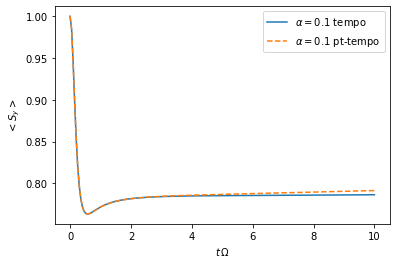

In [9]:
plt.plot(t1, s1_y, label=r'$\alpha=0.1$ tempo')
plt.plot(t2, s2_y, label=r'$\alpha=0.1$ pt-tempo', linestyle="dashed")
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$<S_y>$')
plt.legend()

In [10]:
pt.get_bond_dimensions()

array([  1,   4,  16,  32,  46,  52,  56,  59,  62,  63,  64,  65,  67,
        68,  70,  70,  70,  72,  73,  71,  72,  73,  71,  73,  75,  76,
        77,  78,  80,  81,  81,  80,  80,  78,  77,  78,  78,  79,  81,
        82,  83,  84,  84,  85,  83,  85,  84,  85,  83,  86,  86,  88,
        89,  89,  90,  88,  88,  88,  85,  86,  87,  87,  88,  90,  90,
        92,  92,  93,  94,  95,  97,  96,  96,  93,  92,  94,  94,  94,
        96,  97,  98,  98,  99, 100, 101, 101, 101, 103, 103, 103, 106,
       105, 106, 107, 107, 107, 105, 102, 101, 100, 101, 102, 102, 102,
       104, 105, 104, 103, 103, 103, 103, 101, 101, 101,  98,  97,  96,
        95,  94,  92,  92,  92,  91,  91,  90,  89,  88,  89,  87,  88,
        86,  86,  86,  86,  85,  85,  84,  84,  83,  83,  83,  84,  80,
        81,  80,  80,  79,  80,  78,  78,  78,  77,  75,  76,  76,  75,
        74,  73,  72,  71,  72,  72,  70,  70,  69,  69,  69,  68,  67,
        68,  67,  65,  65,  66,  64,  63,  63,  64,  63,  63,  6